In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import cross_val_score

In [2]:
def read_dataset():
    data = pd.read_csv('./data/banana.dat', comment='@', header=None)
    
    data.columns = ['x1', 'x2', 'y']
    
    return data

In [3]:
def plot_dataset(df):

    # Proporção aproximada do domínio
    plt.figure(figsize=(10 * 1.05,10))
    
    p1 = plt.scatter(df[df.y > 0]['x1'], df[df.y > 0]['x2'],
                c=(0x80 / 255, 0xce / 255, 0xd6 / 255, 0.7), label='+1', marker='o')
    
    p2 = plt.scatter(df[df.y < 0]['x1'], df[df.y < 0]['x2'],
                c=(0xf1 / 255, 0x89 / 255, 0x73 / 255, 0.7), label='-1', marker='o')
    
    plt.legend((p1, p2), ('+1', '-1'))
    
    plt.show()

In [4]:
def train_svm(df, kernel, k, **args):
    m = svm.SVC(kernel=kernel, **args)
    
    scores = cross_val_score(m, df[['x1', 'x2']], df['y'], cv=k, n_jobs=-1)
    
    return scores

In [5]:
def run_svm_test(df):
    
    parameters = [
        ('sigmoid', {'gamma': 1}),
        ('sigmoid', {'gamma': 0.5}),
        ('sigmoid', {'gamma': 0.01}),
        ('linear', {}),
        ('poly', {}),
        ('rbf', {})
    ]
    
    k_values = [ 2, 5, 10 ]
    
    results = dict()
    
    for k in k_values:
        
        results[k] = []
        
        for p in parameters:
            
            r = np.array(train_svm(df, p[0], k, **p[1]))
            
            results[k].append(r)
            
    return results

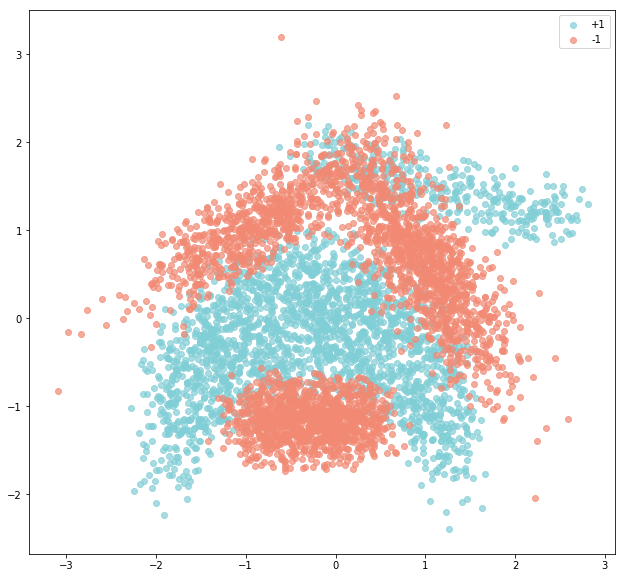

In [6]:
df = read_dataset()

plot_dataset(df)

In [9]:
results = run_svm_test(df)

In [13]:
results

{2: [array([0.28679245, 0.27698113]),
  array([0.30566038, 0.27886792]),
  array([0.55169811, 0.55169811]),
  array([0.55169811, 0.55169811]),
  array([0.64528302, 0.62792453]),
  array([0.90415094, 0.90339623])],
 5: [array([0.28463713, 0.28867925, 0.28018868, 0.28490566, 0.27101039]),
  array([0.29123468, 0.31226415, 0.29433962, 0.29245283, 0.27478754]),
  array([0.55136664, 0.55188679, 0.55188679, 0.55188679, 0.55146364]),
  array([0.55136664, 0.55188679, 0.55188679, 0.55188679, 0.55146364]),
  array([0.63807729, 0.64056604, 0.64622642, 0.63396226, 0.63078376]),
  array([0.89538172, 0.90754717, 0.9       , 0.89528302, 0.91406988])],
 10: [array([0.27683616, 0.29001883, 0.3126177 , 0.26365348, 0.28301887,
         0.27735849, 0.30245747, 0.26465028, 0.26654064, 0.27410208]),
  array([0.28813559, 0.29190207, 0.31826742, 0.29190207, 0.3       ,
         0.28867925, 0.30245747, 0.27410208, 0.28544423, 0.27977316]),
  array([0.55178908, 0.55178908, 0.55178908, 0.55178908, 0.5509434 ,
   